In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('transactional-sample.csv', sep=',', parse_dates=['transaction_date'])
df

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False
...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01 13:05:34.054967,744.15,NaN,False
3195,21323593,9603,59275,528052******3611,2019-11-01 11:47:02.404963,1403.67,NaN,False
3196,21323594,57997,84486,522688******9874,2019-11-01 10:23:50.555604,1.55,NaN,False
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:45.799767,359.68,NaN,False


In [5]:
#validando os dados
df['card_number']=df['card_number'].astype('string')
df['card_number'] = df['card_number'].str.replace(r'\D', '')
df['has_cbk']=df['has_cbk'].astype('string')
df['week_day'] = df['transaction_date'].dt.day_name()
df

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,week_day
0,21320398,29744,97051,4345059116,2019-12-01 23:16:32.812632,374.56,285475.0,False,Sunday
1,21320399,92895,2708,4444564210,2019-12-01 22:45:37.873639,734.87,497105.0,True,Sunday
2,21320400,47759,14777,4258507024,2019-12-01 22:22:43.021495,760.36,NaN,False,Sunday
3,21320401,68657,69758,4642963991,2019-12-01 21:59:19.797129,2556.13,NaN,True,Sunday
4,21320402,54075,64367,6504876116,2019-12-01 21:30:53.347051,55.36,860232.0,False,Sunday
...,...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,6504864139,2019-11-01 13:05:34.054967,744.15,NaN,False,Friday
3195,21323593,9603,59275,5280523611,2019-11-01 11:47:02.404963,1403.67,NaN,False,Friday
3196,21323594,57997,84486,5226889874,2019-11-01 10:23:50.555604,1.55,NaN,False,Friday
3197,21323595,35930,7,5443157773,2019-11-01 01:29:45.799767,359.68,NaN,False,Friday


In [6]:
df.dtypes

transaction_id                 int64
merchant_id                    int64
user_id                        int64
card_number                   string
transaction_date      datetime64[ns]
transaction_amount           float64
device_id                    float64
has_cbk                       string
week_day                      object
dtype: object

In [10]:
nova_tabela = df[['merchant_id','card_number','transaction_date','week_day','transaction_amount','has_cbk']]
nova_tabela['count'] = 1
nova_tabela

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,merchant_id,card_number,transaction_date,week_day,transaction_amount,has_cbk,count
0,29744,4345059116,2019-12-01 23:16:32.812632,Sunday,374.56,False,1
1,92895,4444564210,2019-12-01 22:45:37.873639,Sunday,734.87,True,1
2,47759,4258507024,2019-12-01 22:22:43.021495,Sunday,760.36,False,1
3,68657,4642963991,2019-12-01 21:59:19.797129,Sunday,2556.13,True,1
4,54075,6504876116,2019-12-01 21:30:53.347051,Sunday,55.36,False,1
...,...,...,...,...,...,...,...
3194,50493,6504864139,2019-11-01 13:05:34.054967,Friday,744.15,False,1
3195,9603,5280523611,2019-11-01 11:47:02.404963,Friday,1403.67,False,1
3196,57997,5226889874,2019-11-01 10:23:50.555604,Friday,1.55,False,1
3197,35930,5443157773,2019-11-01 01:29:45.799767,Friday,359.68,False,1


In [11]:
id_cliente = int(input('Qual o código do cliente?'))
numero_cartao = str(input('Qual o número do cartão?'))
valor_transacao = int(input('Qual o valor da transação?'))

filtro_1 = nova_tabela.merchant_id == id_cliente
filtro_2 = nova_tabela.has_cbk == 'False'
#filtro_3 = nova_tabela.week_day == 'Friday'
filtro_4 = nova_tabela.card_number == numero_cartao
#filtro_5 = nova_tabela.transaction_date >= '16:00:00' 
filtro = nova_tabela.loc[filtro_1 & filtro_2 & filtro_4] 
filtro

Qual o código do cliente? 29744
Qual o número do cartão? 4345059116
Qual o valor da transação? 2000


,merchant_id,card_number,transaction_date,week_day,transaction_amount,has_cbk,count
0,29744,4345059116,2019-12-01 23:16:32.812632,Sunday,374.56,False,1


In [12]:
#filtro.count()
#numero de tentativas com o mesmo cartão
filtro.groupby(['merchant_id','card_number','has_cbk']).size().sort_values(ascending=False)

merchant_id  card_number  has_cbk
29744        4345059116   False      1
dtype: int64

In [13]:
valor_total = filtro['transaction_amount'].sum()
valor_medio = filtro['transaction_amount'].mean()
valor_max = filtro['transaction_amount'].max()
print('O Valor total das transações recusadas é:', valor_total,
      '\n O Valor médio das transações recusadas é:', valor_medio,
     '\n O Valor máximo das transações recusadas é:', valor_max)

O Valor total das transações recusadas é: 374.56 
 O Valor médio das transações recusadas é: 374.56 
 O Valor máximo das transações recusadas é: 374.56


In [14]:
if (valor_transacao>valor_max):
    print('Valor da transação maior do que o valor máximo das transações anteriores, ATENÇÃO!')
elif (valor_transacao==valor_max):
    print('Valor da transação igual ao valor máximo das transações anteriores, ATENÇÃO!')
else:
    print('O Valor da transação atual é menor do que o valor máximo das transações anteriores!')
    
    
    

Valor da transação maior do que o valor máximo das transações anteriores, ATENÇÃO!


In [15]:
day_1 = nova_tabela.loc[nova_tabela.week_day == 'Sunday']
day_2 = nova_tabela.loc[nova_tabela.week_day == 'Monday']
day_3 = nova_tabela.loc[nova_tabela.week_day == 'Tuesday']
day_4 = nova_tabela.loc[nova_tabela.week_day == 'Wednesday']
day_5 = nova_tabela.loc[nova_tabela.week_day == 'Thursday']
day_6 = nova_tabela.loc[nova_tabela.week_day == 'Friday']
day_7 = nova_tabela.loc[nova_tabela.week_day == 'Saturday']

v1 = day_1['transaction_amount'].sum()
v2 = day_2['transaction_amount'].sum()
v3 = day_3['transaction_amount'].sum()
v4 = day_4['transaction_amount'].sum()
v5 = day_5['transaction_amount'].sum()
v6 = day_6['transaction_amount'].sum()
v7 = day_7['transaction_amount'].sum()

a1 = day_1['count'].sum()
a2 = day_2['count'].sum()
a3 = day_3['count'].sum()
a4 = day_4['count'].sum()
a5 = day_5['count'].sum()
a6 = day_6['count'].sum()
a7 = day_7['count'].sum()

#a = [day_1['week_day'], day_2['week_day'], day_3['week_day'], day_4['week_day'], day_5['week_day'], day_6['week_day'], day_7['week_day']]
b = [v1, v2, v3, v4, v5, v6, v7]
c = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
a = [a1, a2, a3, a4, a5, a6, a7]




In [16]:
#classificação dos dados
nova_tabela.groupby(['merchant_id','card_number','has_cbk']).size().sort_values(ascending=False)

merchant_id  card_number  has_cbk
77130        5544827640   True       10
30121        5201327705   False       5
93520        4329577262   False       5
89943        6516532256   True        5
36929        6516603628   False       4
                                     ..
32186        5447315751   False       1
             5502097657   False       1
32213        5502095404   False       1
             5502096493   False       1
99799        4108636554   False       1
Length: 2970, dtype: int64

In [17]:
#calculando os clientes que mais acumulam transações falsas
f2 = nova_tabela.merchant_id == 49205
f3 = nova_tabela.has_cbk == 'False'
fa = nova_tabela.loc[f3] 
fb = nova_tabela.loc[f2 & f3] 
fa.groupby(['merchant_id','has_cbk']).size().sort_values(ascending=False)

merchant_id  has_cbk
49205        False      73
79698        False      22
26765        False      18
17348        False      16
26981        False      16
                        ..
37432        False       1
37339        False       1
37267        False       1
37229        False       1
99799        False       1
Length: 1690, dtype: int64

In [20]:
#cartão com mais tentativa falsa
q1 = nova_tabela.has_cbk == 'False'
q = nova_tabela.loc[q1] 
q.groupby(['card_number','has_cbk']).size().sort_values(ascending=False)

card_number  has_cbk
4329577262   False      7
5201327705   False      6
5368057429   False      4
6516603628   False      4
4551872744   False      4
                       ..
5067411248   False      1
5067411327   False      1
5067416788   False      1
5067417240   False      1
6550077278   False      1
Length: 2658, dtype: int64

In [48]:
#número de clientes que já tiveram uma tentativa falsa
v = nova_tabela.drop_duplicates(subset='merchant_id', keep="last")
fv1 = v.has_cbk == 'False'
fv2 = v.loc[fv1] 
sum_v = fv2['count'].sum()
sum_v

1672

In [56]:
#porcentagem de clientes que já teve alguma transação falsa
sum_tot = v['count'].sum()
sum_tot
p_tot = (sum_v/sum_tot)*100
p_tot

95.21640091116174

In [18]:
#número de cartões que já tiveram uma tentativa falsa
w = nova_tabela.drop_duplicates(subset='card_number', keep="last")
fw1 = w.has_cbk == 'False'
fw2 = w.loc[fw1] 
#sum_v = fv2['count'].sum()
#sum_v
sum_w = fw2['count'].sum()
sum_w

2657

In [21]:
#cartão com mais tentativa falsa
q1 = nova_tabela.has_cbk == 'False'
q = nova_tabela.loc[q1] 
q.groupby(['card_number','has_cbk']).size().sort_values(ascending=False)

card_number  has_cbk
4329577262   False      7
5201327705   False      6
5368057429   False      4
6516603628   False      4
4551872744   False      4
                       ..
5067411248   False      1
5067411327   False      1
5067416788   False      1
5067417240   False      1
6550077278   False      1
Length: 2658, dtype: int64

In [17]:
#valor total de transações
dw = nova_tabela['transaction_amount'].sum()
dw

2456233.48

In [18]:
#total de transações 
dq = nova_tabela['count'].sum()
dq

3199

In [ ]:
#calculando o total em valores reais de transações falsas 
f1 = nova_tabela.has_cbk == 'False'
f = nova_tabela.loc[f1] 
valor_tot = f['transaction_amount'].sum()
valor_tot

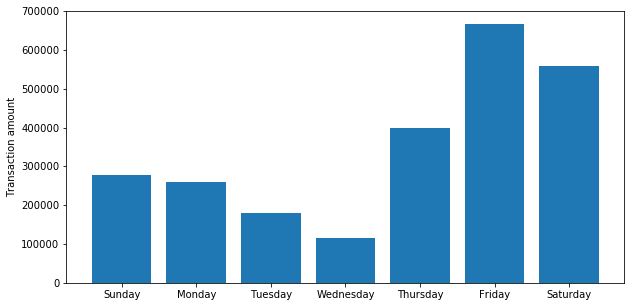

In [22]:
#valor total de transações por dias da semana
plt.figure(figsize=(10,5))
plt.bar(c,b)
plt.ylabel("Transaction amount")
plt.show()

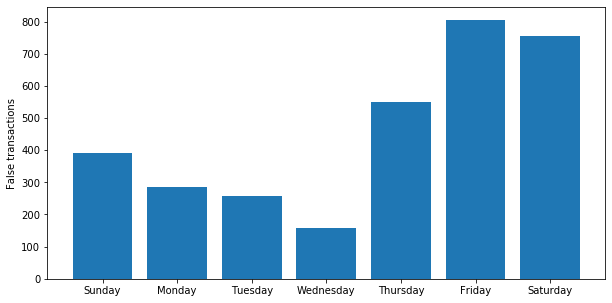

In [23]:
#numeros de transações por dia da semana
plt.figure(figsize=(10,5))
plt.bar(c,a)
plt.ylabel("False transactions")
plt.show()